# 1.数据可视化

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.io as sio
import numpy as np

# data1

In [2]:
mat = sio.loadmat('./data/ex7data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
data1 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data1.head()

,X1,X2
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506


D:\Programmingtools\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


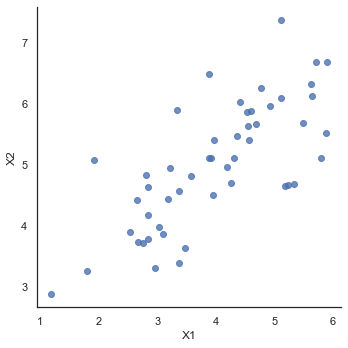

In [4]:
sns.set(context="notebook", style="white")
sns.lmplot('X1', 'X2', data=data1, fit_reg=False)
plt.show()

# data2

In [5]:
mat = sio.loadmat('./data/ex7data2.mat')
data2 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


D:\Programmingtools\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


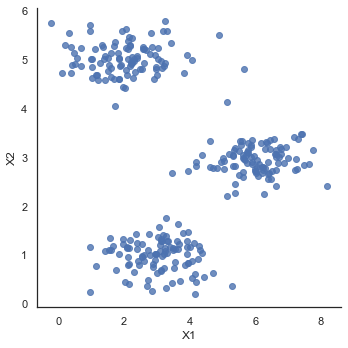

In [6]:
sns.lmplot('X1', 'X2', data=data2, fit_reg=False)
plt.show()

## 实现一

In [7]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)

    for i in range(m):
        min_dist = 100000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx

In [8]:
data = sio.loadmat('data/ex7data2.mat')
X = data['X']
print(X.shape)
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = find_closest_centroids(X, initial_centroids)
idx[0:3]

(300, 2)


array([0., 2., 1.])

In [9]:
def compute_centroids(X, idx, k):
    m , n = X.shape
    centroids  = np.zeros((k, n))

    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices, :], axis=1) / len(indices[0]))

    return centroids

In [10]:
compute_centroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [11]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids

    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids


In [12]:
def initial_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)

    for i in range(k):
        centroids[i,:] = X[idx[i], :]
    
    return centroids

In [13]:
idx, centroids = run_k_means(X, initial_centroids(X, 3), 10)

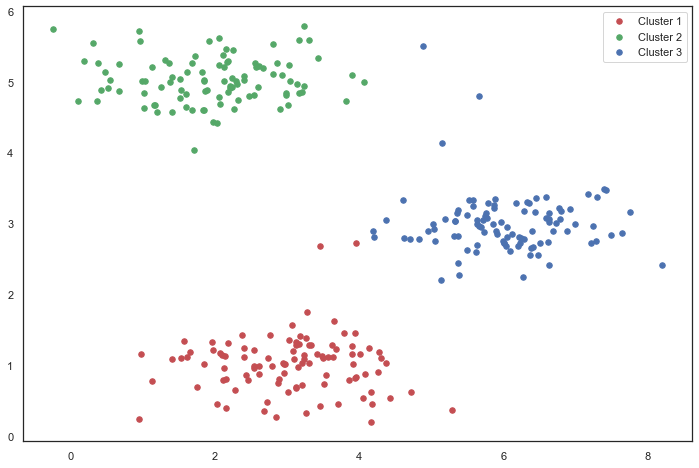

In [14]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(cluster1[:,0],cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0],cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0],cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()


随机初始化聚类中心

In [15]:
initial_centroids(X, 3)

array([[2.97970391, 4.80671081],
       [6.17443157, 3.29026488],
       [1.02285128, 5.0105065 ]])

# 实现二

In [16]:
""" 将点和分类联系 """
def combine_data_C(data, C):
    data_with_c = data.copy()
    data_with_c['C'] = C
    return data_with_c

In [17]:
""" 随机初始化centroids """
def random_init(data, k):
    return data.sample(k)
""" python中的sample是random模块中的一个函数
    它的作用是从指定序列中随机获取指定长度的片断并随机排列
    结果以列表的形式返回 sample函数不会修改原有序列。 
"""

' python中的sample是random模块中的一个函数\n    它的作用是从指定序列中随机获取指定长度的片断并随机排列\n    结果以列表的形式返回 sample函数不会修改原有序列。 \n'

In [18]:
""" 计算出最近的centroid """
def _find_your_cluster(x, centroids):
    distances = np.apply_along_axis(func1d=np.linalg.norm,
                                    axis=1,
                                    arr=centroids - x)
    return np.argmin(distances)
""" apply_along_axis(funcld, axis, arr, *args, **kwargs) 
    funcld:自定义函数
    axis：坐标轴
    arr:输入的数组
    *args **kwargs:自定义函数补充的参数
    np.linalg.norm:求范数
"""


' apply_along_axis(funcld, axis, arr, *args, **kwargs) \n    funcld:自定义函数\n    axis：坐标轴\n    arr:输入的数组\n    *args **kwargs:自定义函数补充的参数\n    np.linalg.norm:求范数\n'

In [19]:
""" 分配聚类 """
def assign_cluster(data, centroids):
    return np.apply_along_axis(lambda x:_find_your_cluster(x, centroids),
                               axis=1,
                               arr= data)

In [20]:
""" 计算新的centroids """
def new_centroids(data, C):
    data_with_c = combine_data_C(data, C)

    return data_with_c.groupby('C', as_index=False).\
                       mean().\
                       sort_values(by='C').\
                       drop('C', axis=1).\
                       values

In [21]:
def cost(data, centroids, C):
    m = data.shape[0]

    expand_C_with_centroids = centroids[C]

    distances = np.apply_along_axis(func1d=np.linalg.norm,
                                    axis=1,
                                    arr=data.values - expand_C_with_centroids)

    return distances.sum() / m

In [22]:
def _k_means_iter(data, k, epoch=100, tol=0.0001):
    centroids = random_init(data,k)
    cost_progress = []

    for i in range(epoch):
        print('running epoch {}'.format(i))

        C = assign_cluster(data, centroids)
        centroids = new_centroids(data, C)
        cost_progress.append(cost(data, centroids, C))

        if len(cost_progress) > 1: #提前停止
            if (np.abs(cost_progress[-1] - cost_progress[-2])) / cost_progress[-1] < tol:
                break
        
    return C, centroids, cost_progress[-1]

In [23]:
def k_means(data, k, epoch=100, n_init=10):
    """ do mutiple random init and pick the best one to return
    Args:
        data(pd.DataFrame)
    Returns:
        (C, centroids, least_cost)
    """

    tries = np.array([_k_means_iter(data, k, epoch) for _ in range(n_init)])
    least_cost_idx = np.argmin(tries[:,-1])

    return tries[least_cost_idx]

In [24]:
random_init(data2, 3)

,X1,X2
238,5.887356,3.346156
282,6.727981,3.004398
89,3.171096,5.594645


## 1.cluster assignment

In [25]:
init_centroids = random_init(data2,3).values
init_centroids

array([[0.31319845, 5.54694644],
       [5.76634959, 3.14271707],
       [3.91596068, 1.01225774]])

In [26]:
x = np.array([1,1])

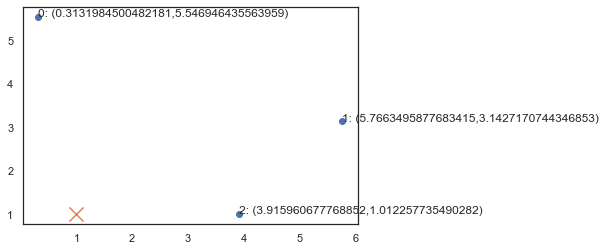

In [27]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x=init_centroids[:, 0], y=init_centroids[:, 1])

for i, node in enumerate(init_centroids):
    ax.annotate('{}: ({},{})'.format(i, node[0],node[1]),node)

ax.scatter(x[0], x[1], marker='x', s=200)
plt.show()

In [28]:
_find_your_cluster(x, init_centroids)

2

### 1 epoch cluster assigning

In [29]:
C = assign_cluster(data2, init_centroids)
data_with_c = combine_data_C(data2, C)
data_with_c.head()

,X1,X2,C
0,1.842080,4.607572,0
1,5.658583,4.799964,1
2,6.352579,3.290854,1
3,2.904017,4.612204,0
4,3.231979,4.939894,0


See the first round clustering result

D:\Programmingtools\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


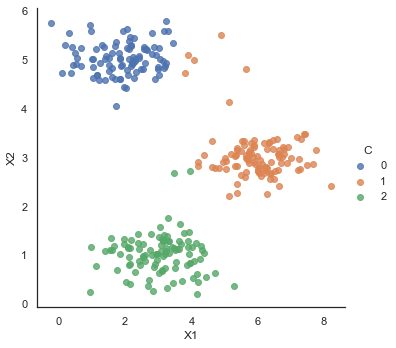

In [30]:
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

## 2.calculate new centroid

In [31]:
new_centroids(data2,C)

array([[1.8916712 , 5.02822013],
       [5.97232475, 3.05706276],
       [3.04367119, 1.01541041]])

### putting all together, take1

In [32]:
final_C, final_centroid, _ = _k_means_iter(data2, 3)
data_with_c = combine_data_C(data2, final_C)

running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4


D:\Programmingtools\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


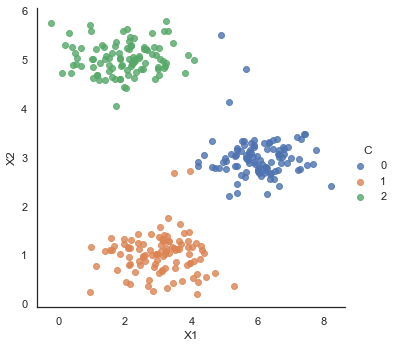

In [33]:
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

In [34]:
cost(data2, final_centroid, final_C)

0.794176363371587

加上多次随机初始化centroid

In [37]:
best_C, best_centroid, least_cost = k_means(data2, 3)

running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 7
running epoch 8
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 0
running epoch 1
running epoch 2
running epoch 3


C:\Users\Carlos\AppData\Local\Temp/ipykernel_11744/2497228976.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tries = np.array([_k_means_iter(data, k, epoch) for _ in range(n_init)])


In [40]:
least_cost

0.794176363371587

D:\Programmingtools\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


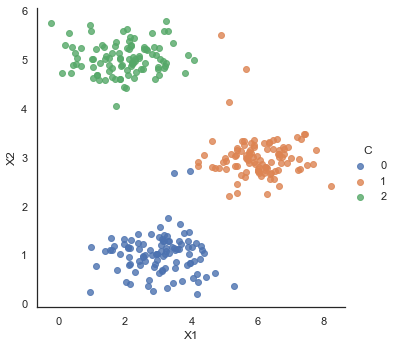

In [42]:
data_with_c = combine_data_C(data2, best_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

# try sklearn k-means

In [43]:
from sklearn.cluster import KMeans

In [44]:
sk_kmeans = KMeans(n_clusters=3)

In [45]:
sk_kmeans.fit(data2)

KMeans(n_clusters=3)

In [47]:
sk_c = sk_kmeans.predict(data2)
sk_c

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

D:\Programmingtools\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


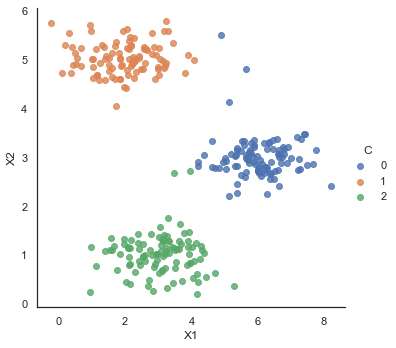

In [48]:
data_with_c = combine_data_C(data2, sk_c)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()